<a href="https://colab.research.google.com/github/Fahdlabba/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
from zipfile import ZipFile 
dataset="/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(dataset,'r')as zip : 
  zip.extractall()
  print("Dataset Extracted ")

Dataset Extracted 


In [8]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mping
from PIL import Image
import cv2

In [9]:
benign_tumorFiles=os.listdir("/content/no")
malignant_tumorFiles=os.listdir("/content/yes")

In [10]:
print(len(benign_tumorFiles))

98


In [11]:
print(len(malignant_tumorFiles))

155


In [12]:
print(benign_tumorFiles[:5])
print(malignant_tumorFiles[:5])

['No20.jpg', 'no 97.jpg', 'No17.jpg', 'no 9.png', '28 no.jpg']
['Y195.JPG', 'Y96.jpg', 'Y166.JPG', 'Y33.jpg', 'Y70.jpg']


Create Label

**0->Benign Tumor**

**1->Malignant**

In [13]:
benign_label=[0]*98
malignant_label=[1]*155

In [14]:
labels=benign_label+malignant_label

Display Some Image 

In [15]:
def display():
  images_path=["/content/no/1 no.jpeg",
               "/content/yes/Y1.jpg",
               ]
  for path in images_path : 
    image=mping.imread(path)
    imgplot=plt.imshow(image)
    plt.show()

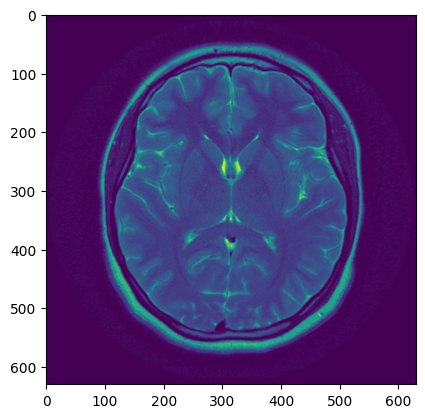

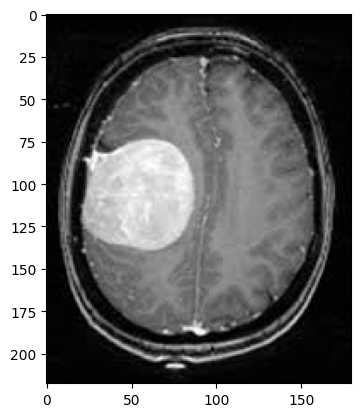

In [16]:
display()

#Image Prerocessing 

In [17]:
files_list=[benign_tumorFiles,malignant_tumorFiles]
i=0;
data=[]
folder_path=["/content/no/","/content/yes/"]
def convert_to_gray () :
  global i
  for path in folder_path:
    for img_file in files_list[i]:
      image=Image.open(path + img_file)
      image=image.resize((128,128))
      image=image.convert("L")
      image=np.array(image)
      data.append(image)
    i+=1




In [18]:
convert_to_gray()

In [19]:
type(data)

list

In [20]:
data[0].shape

(128, 128)

In [21]:
X=np.array(data)
Y=np.array(labels)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [24]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [25]:
print(X_train)

[[[254 252 252 ... 254 249 254]
  [252 250 254 ... 254 252 254]
  [251 254 225 ... 233 253 254]
  ...
  [254 254 189 ... 207 253 254]
  [251 251 253 ... 252 252 253]
  [253 254 252 ... 254 253 254]]

 [[ 29   7   0 ...   0   0   0]
  [ 29   7   0 ...   0   0   0]
  [ 29   7   0 ...   0   0   0]
  ...
  [ 28   6   1 ...   1   1   1]
  [ 28   8   3 ...   2   2   2]
  [ 29  25  25 ...  18  18  18]]

 [[  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  ...
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[ 31  31  31 ...  31  31  31]
  [ 31  31  31 ...  31  31  31]
  [ 31  31  31 ...  31  31  31]
  ...
  [ 31  31  31 ...  30  30  30]
  [ 31  31  31 ...  30  30  30]
  [ 31  31  31 ...  31  31  

In [26]:
print(X_train_scaled)

[[[0.99607843 0.98823529 0.98823529 ... 0.99607843 0.97647059 0.99607843]
  [0.98823529 0.98039216 0.99607843 ... 0.99607843 0.98823529 0.99607843]
  [0.98431373 0.99607843 0.88235294 ... 0.91372549 0.99215686 0.99607843]
  ...
  [0.99607843 0.99607843 0.74117647 ... 0.81176471 0.99215686 0.99607843]
  [0.98431373 0.98431373 0.99215686 ... 0.98823529 0.98823529 0.99215686]
  [0.99215686 0.99607843 0.98823529 ... 0.99607843 0.99215686 0.99607843]]

 [[0.11372549 0.02745098 0.         ... 0.         0.         0.        ]
  [0.11372549 0.02745098 0.         ... 0.         0.         0.        ]
  [0.11372549 0.02745098 0.         ... 0.         0.         0.        ]
  ...
  [0.10980392 0.02352941 0.00392157 ... 0.00392157 0.00392157 0.00392157]
  [0.10980392 0.03137255 0.01176471 ... 0.00784314 0.00784314 0.00784314]
  [0.11372549 0.09803922 0.09803922 ... 0.07058824 0.07058824 0.07058824]]

 [[0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
  [0.00392157 0.003921

In [27]:
import tensorflow as tf
tf.random.set_seed(2)
from tensorflow import keras

In [28]:
model =keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

In [29]:
model.compile(optimizer="Adam",
              loss="binary_crossentropy",
              metrics=["acc"])

In [30]:
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
6/6 [==============================] - 10s 943ms/step - loss: 81.5024 - acc: 0.5304 - val_loss: 21.2423 - val_acc: 0.5714
Epoch 2/5
6/6 [==============================] - 6s 868ms/step - loss: 15.0335 - acc: 0.5912 - val_loss: 1.7977 - val_acc: 0.4762
Epoch 3/5
6/6 [==============================] - 5s 748ms/step - loss: 2.5671 - acc: 0.5691 - val_loss: 0.6184 - val_acc: 0.6667
Epoch 4/5
6/6 [==============================] - 6s 1s/step - loss: 0.6921 - acc: 0.7403 - val_loss: 0.6456 - val_acc: 0.6190
Epoch 5/5
6/6 [==============================] - 4s 727ms/step - loss: 0.5619 - acc: 0.7514 - val_loss: 0.6972 - val_acc: 0.5238


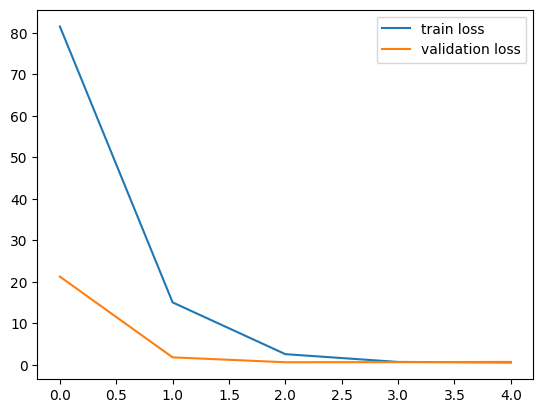

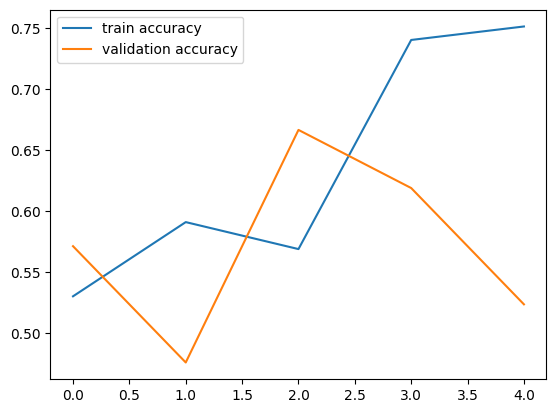

In [31]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Overfitting caused by dataset(small) so we need image augmentation to prevent this overfitting problem

In [32]:
data="/content/brain_tumor_dataset"


In [33]:
!ls /content/brain_tumor_dataset

no  yes


In [34]:
!ls /content/brain_tumor_dataset/yes/

Y100.JPG  Y12.jpg   Y166.JPG  Y195.JPG	Y254.jpg  Y38.jpg  Y59.JPG  Y82.jpg
Y101.jpg  Y13.jpg   Y167.JPG  Y19.JPG	Y255.JPG  Y39.jpg  Y60.jpg  Y85.JPG
Y102.jpg  Y146.JPG  Y168.jpg  Y1.jpg	Y256.JPG  Y3.jpg   Y61.jpg  Y86.JPG
Y103.jpg  Y147.JPG  Y169.jpg  Y20.jpg	Y257.jpg  Y40.JPG  Y62.jpg  Y89.JPG
Y104.jpg  Y148.JPG  Y16.JPG   Y21.jpg	Y258.JPG  Y41.jpg  Y65.JPG  Y8.jpg
Y105.jpg  Y14.jpg   Y170.JPG  Y22.jpg	Y259.JPG  Y42.jpg  Y66.JPG  Y90.jpg
Y106.jpg  Y153.jpg  Y17.jpg   Y23.JPG	Y25.jpg   Y44.JPG  Y67.JPG  Y91.jpg
Y107.jpg  Y154.jpg  Y180.jpg  Y242.JPG	Y26.jpg   Y45.JPG  Y69.jpg  Y92.jpg
Y108.jpg  Y155.JPG  Y181.jpg  Y243.JPG	Y27.jpg   Y46.jpg  Y6.jpg   Y92.png
Y109.JPG  Y156.JPG  Y182.JPG  Y244.JPG	Y28.jpg   Y47.JPG  Y70.jpg  Y95.jpg
Y10.jpg   Y157.JPG  Y183.jpg  Y245.jpg	Y29.jpg   Y49.JPG  Y71.JPG  Y96.jpg
Y111.JPG  Y158.JPG  Y184.JPG  Y246.JPG	Y2.jpg	  Y4.jpg   Y73.jpg  Y97.JPG
Y112.JPG  Y159.JPG  Y185.jpg  Y247.JPG	Y30.jpg   Y50.JPG  Y74.jpg  Y98.JPG
Y113.JPG  Y15.jpg   Y186.jpg  Y248

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
generator = ImageDataGenerator(rescale = 1./255.,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              shear_range=0.2,
                              rotation_range=25,
                               )

In [37]:
train_dataset=generator.flow_from_directory(
    data ,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)
test_dataset=generator.flow_from_directory(
    data ,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)
validation_dataset=generator.flow_from_directory(
    data ,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [38]:
test_dataset

In [39]:
model =keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [40]:
model.compile(optimizer="Adam",
              loss="binary_crossentropy",
              metrics=["acc"])

In [41]:
history=model.fit(train_dataset,validation_data=validation_dataset,epochs=10)

Epoch 1/10
8/8 [==============================] - 39s 5s/step - loss: 2.2108 - acc: 0.5731 - val_loss: 0.6624 - val_acc: 0.6126
Epoch 2/10
8/8 [==============================] - 39s 5s/step - loss: 0.6333 - acc: 0.6126 - val_loss: 0.6379 - val_acc: 0.6126
Epoch 3/10
8/8 [==============================] - 38s 5s/step - loss: 0.6305 - acc: 0.6126 - val_loss: 0.6238 - val_acc: 0.6126
Epoch 4/10
8/8 [==============================] - 38s 5s/step - loss: 0.6327 - acc: 0.6166 - val_loss: 0.5839 - val_acc: 0.7036
Epoch 5/10
8/8 [==============================] - 39s 5s/step - loss: 0.6263 - acc: 0.6443 - val_loss: 0.5685 - val_acc: 0.7273
Epoch 6/10
8/8 [==============================] - 38s 5s/step - loss: 0.6045 - acc: 0.6759 - val_loss: 0.5602 - val_acc: 0.7431
Epoch 7/10
8/8 [==============================] - 38s 5s/step - loss: 0.5623 - acc: 0.7154 - val_loss: 0.5711 - val_acc: 0.6996
Epoch 8/10
8/8 [==============================] - 39s 5s/step - loss: 0.5615 - acc: 0.7036 - val_loss: 0

In [45]:
h = history
def plot_perferomence (h):
  # plot the loss value
  plt.plot(h.history['loss'], label='train loss')
  plt.plot(h.history['val_loss'], label='validation loss')
  plt.legend()
  plt.show()
  plt.plot(h.history['acc'], label='train accuracy')
  plt.plot(h.history['val_acc'], label='validation accuracy')
  plt.legend()
  plt.show()

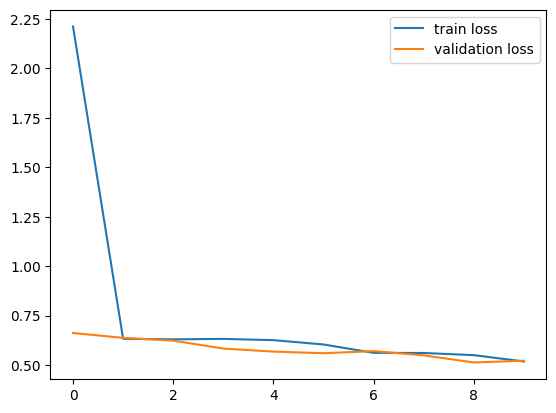

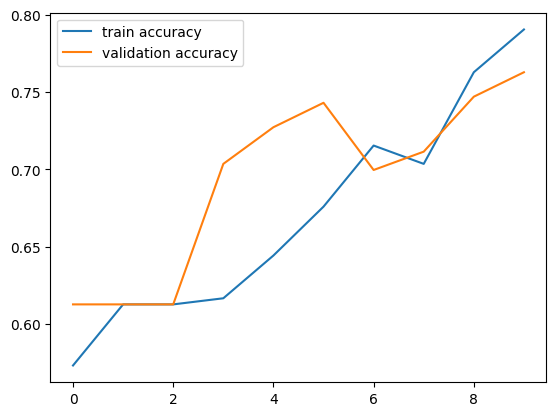

In [46]:
plot_perferomence(h)

In [44]:
loss, accuracy = model.evaluate(test_dataset)
print('Test Accuracy =', accuracy)

8/8 [==============================] - 11s 1s/step - loss: 0.5233 - acc: 0.7708
Test Accuracy = 0.7707509994506836


BAMMMMMM !!!! overfitting problem solved xD 


if we increase epochs number maybe we get a better accuracy score (epoch >= 20)